# **Limpieza de Datos, transformaciones y filtros - Proyecto, Entrega 2**

________________________________________________________




Juan José Gómez Arenas

Federico García Gutiérrez

**Objetivos**

- Aplicar transformaciones y filtros realizadas sobre los datos
- Realizar procesos de limpiza y estandarización sobre los datos

**Fecha:** Noviembre, 11 / 2023

  
  **(Cada paso sera documentado)**
________________________________________


In [ ]:
# Manipulación de datos
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import requests

#Visualización de datos perdidos
import missingno as msno


________________________________________________________

##**Carga y descripcion general de datos - Arrestos**

In [ ]:
# Leer los datos desde un archivo csv

url = 'https://drive.google.com/uc?id=111QQRkipJpMp6LAcPTPT3hBifZsxrJmp&confirm=t'

# Descargar en archivo temporal
with open('temp.csv', 'wb') as f:
    f.write(requests.get(url).content)

# Leer en Dataframe
df = pd.read_csv('temp.csv')


In [ ]:
#Información de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498650 entries, 0 to 5498649
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 797.1+ MB


In [ ]:
# Ver las primeras 5 líneas de los datos
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


In [ ]:
len(df)

5498650

In [ ]:
len(df.dropna())

5467074

________________________________________________________

Ahora verificamos el numero de datos faltantes en el dataset

###**Verifiación de datos**

En primer lugar se verifica la cantidad de valores nulos que tiene cada una de las columnas

In [ ]:
# Numero de valores faltantes por cada columna
df.isnull().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  874
PD_DESC               9169
KY_CD                 9739
OFNS_DESC             9169
LAW_CODE               196
LAW_CAT_CD           22001
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

Para visualizar facilmente los datos faltantes se puede utilizar la libreria missingno, donde se ven los datos faltantes como espacios blancos en el dataset.

<Axes: >

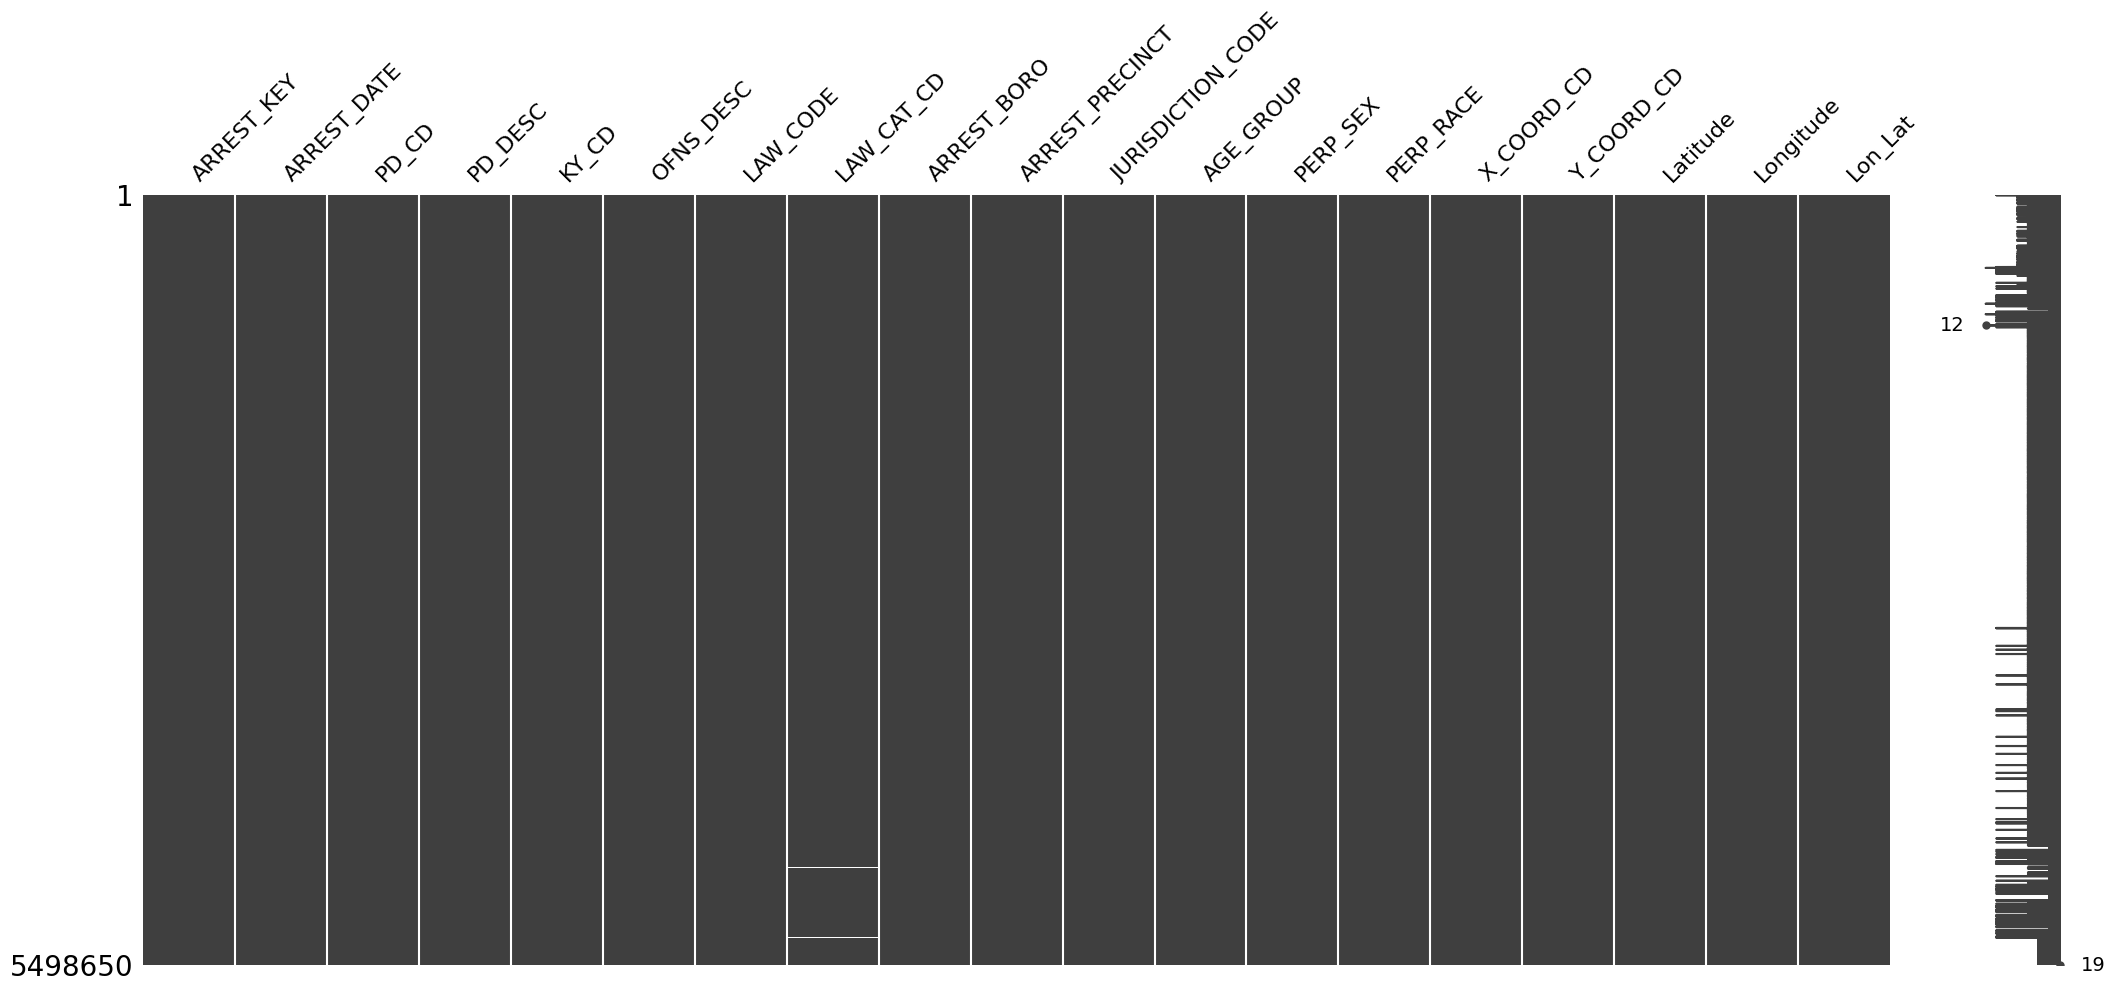

In [ ]:
msno.matrix(df)

Otra forma de visualizar los datos de los valores perdidos es mediante el uso de gráficos de barras. Estas barras muestran los valores que son proporcionales a los datos que no faltan en el conjunto de datos.

<Axes: >

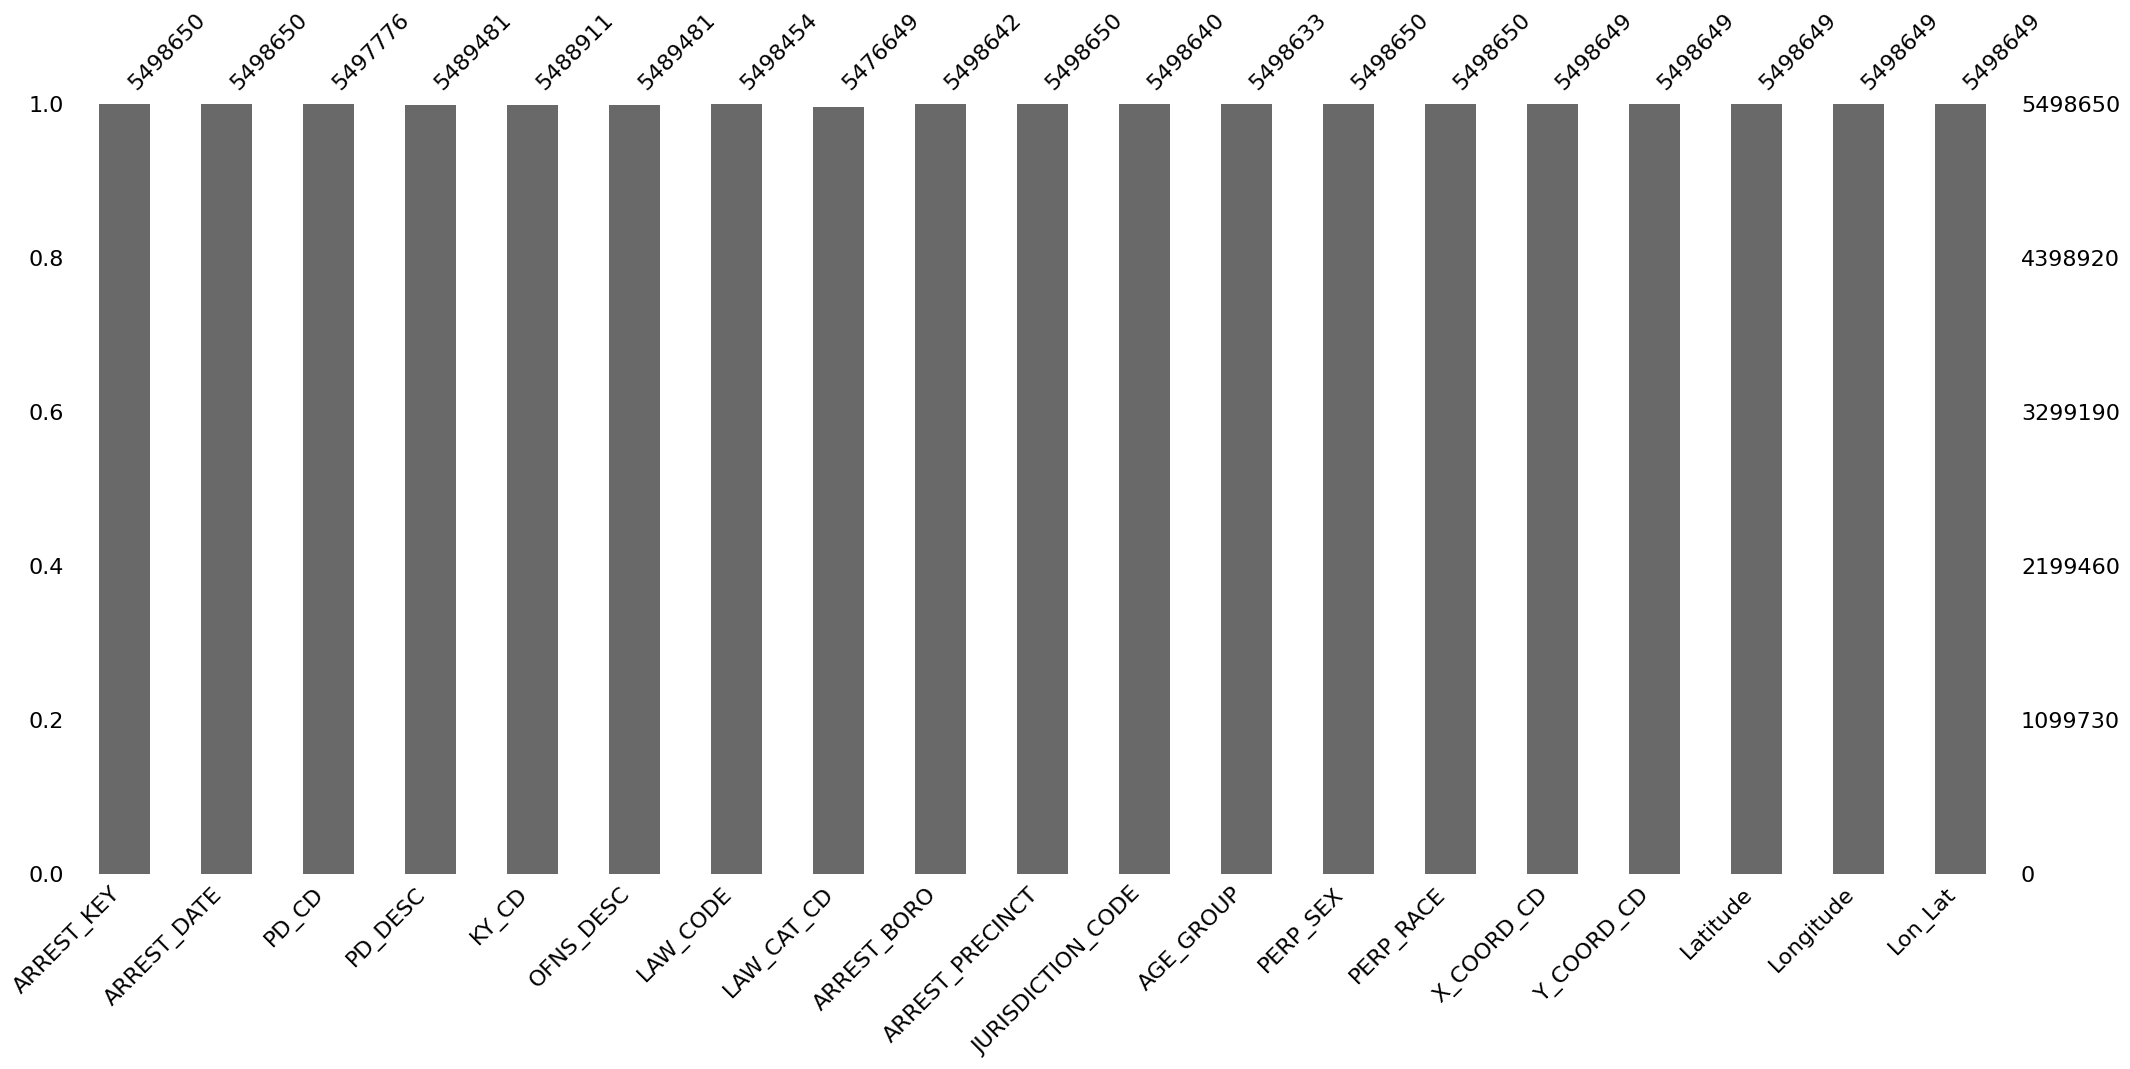

In [ ]:
msno.bar(df)

In [ ]:
#Borro las tuplas con datos faltantes
df = df.dropna()

Decido borrar las tuplas con valores faltantes ya que corresponden al 0.92 % sobre el total de los datos

In [ ]:
len(df)

5467074

###**Simplificacion**
Nueva York se compone de 5 regiones principales, los cuales son
- The Bronx
- Brooklyn
- Manhattan
- Queens
- Staten Islands

Para terminos practicos, se va a estandarizar poniendo el nombre completo en la columna de ARREST_BORO, de manera que se pueda saber en que sector se realizo, y se eliminara la informacion relacionada con la ubicacion geografica de arrestos.  

In [ ]:
# Define un diccionario de mapeo para reemplazar las abreviaturas en 'ARREST_BORO'
mapeo_boro = {'B': 'Bronx', 'S': 'Staten Island', 'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens'}

# Reemplaza los valores en 'ARREST_BORO' usando el diccionario de mapeo
df['ARREST_BORO'] = df['ARREST_BORO'].replace(mapeo_boro)


Por otra parte, para tener mas claridad en la jurisdiccion y no tener que recurrir a codigos para comprender los datos se reemplazan con lo que corresponden

In [ ]:

# Define un diccionario de mapeo para reemplazar los códigos de jurisdicción
mapeo_jurisdiccion = {0: 'Patrol (NYPD)', 1: 'Transit (NYPD)', 2: 'Housing (NYPD)'}

# Utiliza map para aplicar el mapeo y luego fillna para asignar 'NO-NYPD' a los valores no coincidentes
df['JURISDICTION_CODE'] = df['JURISDICTION_CODE'].map(mapeo_jurisdiccion).fillna('NO-NYPD')




In [ ]:
# Define un diccionario de mapeo para reemplazar los códigos de nivel de delito
mapeo_nivel_delito = {'F': 'Felony', 'M': 'Misdemeanor', 'V': 'Violation'}

# Reemplaza los valores en 'LAW_CAT_CD' usando el diccionario de mapeo
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace(mapeo_nivel_delito)

In [ ]:
mapeo_genero = {'M': 'Male', 'F': 'Female'}

# Reemplaza los valores en 'PERP_SEX' usando el diccionario de mapeo
df['PERP_SEX'] = df['PERP_SEX'].replace(mapeo_genero)

___________________________________________________________________________________

Ademas borro columnas que ocupan demasiado espacio y no aportan mucho en nuestro contexto

In [ ]:
#Información de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498650 entries, 0 to 5498649
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 797.1+ MB


In [ ]:
# Lista de columnas que deseas eliminar
columnas_a_eliminar = ['ARREST_KEY','PD_CD','PD_DESC', 'LAW_CODE','KY_CD','X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat']

# Elimina las columnas especificadas
df = df.drop(columnas_a_eliminar, axis=1)

# Ahora df no contiene las columnas especificadas

In [ ]:
# Define un diccionario de mapeo de números de presintos a calles
mapeo_presintos = {
    1: '16 Ericsson Place',
    5: '19 Elizabeth Street',
    6: '233 West 10 Street',
    7: '19 1/2 Pitt Street',
    9: '321 East 5 Street',
    10: '230 West 20th Street',
    13: '230 East 21st Street',
    'Midtown South Precinct': '357 West 35th Street',
    17: '167 East 51st Street',
    'Midtown North Precinct': '306 West 54th Street',
    19: '153 East 67th Street',
    20: '120 West 82nd Street',
    'Central Park Precinct': '86th St & Transverse Road',
    23: '164 East 102nd Street',
    24: '151 West 100th Street',
    25: '120 East 119th Street',
    26: '520 West 126th Street',
    28: '2271-89 8th Avenue',
    30: '451 West 151st Street',
    32: '250 West 135th Street',
    33: '2207 Amsterdam Avenue',
    34: '4295 Broadway',
    40: '257 Alexander Avenue',
    41: '1035 Longwood Avenue',
    42: '830 Washington Avenue',
    43: '900 Fteley Avenue',
    44: '2 East 169th Street',
    45: '2877 Barkley Avenue',
    46: '2120 Ryer Avenue',
    47: '4111 Laconia Avenue',
    48: '450 Cross Bronx Expressway',
    49: '2121 Eastchester Road',
    50: '3450 Kingsbridge Avenue',
    52: '3016 Webster Avenue',
    60: '2951 West 8th Street',
    61: '2575 Coney Island Avenue',
    62: '1925 Bath Avenue',
    63: '1844 Brooklyn Avenue',
    66: '5822 16th Avenue',
    67: '2820 Snyder Avenue',
    68: '333 65th Street',
    69: '9720 Foster Avenue',
    70: '154 Lawrence Avenue',
    71: '421 Empire Boulevard',
    72: '830 4th Avenue',
    73: '1470 East New York Avenue',
    75: '1000 Sutter Avenue',
    76: '191 Union Street',
    77: '127 Utica Avenue',
    78: '65 6th Avenue',
    79: '263 Tompkins Avenue',
    81: '30 Ralph Avenue',
    83: '480 Knickerbocker Avenue',
    84: '301 Gold Street',
    88: '298 Classon Avenue',
    90: '211 Union Avenue',
    94: '100 Meserole Avenue',
    100: '92-24 Rockaway Beach Boulevard',
    101: '16-12 Mott Avenue',
    102: '87-34 118th Street',
    103: '168-02 P.O Edward Byrne Ave.',
    104: '64-2 Catalpa Avenue',
    105: '92-08 222nd Street',
    106: '103-53 101st Street',
    107: '71-01 Parsons Boulevard',
    108: '5-47 50th Avenue',
    109: '37-05 Union Street',
    110: '94-41 43rd Avenue',
    111: '45-06 215th Street',
    112: '68-40 Austin Street',
    113: '167-02 Baisley Boulevard',
    114: '34-16 Astoria Boulevard',
    115: '92-15 Northern Boulevard',
    120: '78 Richmond Terrace',
    121: '970 Richmond Avenue',
    122: '2320 Hylan Boulevard',
    123: '116 Main Street'
}

# Reemplaza los valores en 'ARREST_PRECINCT' usando el diccionario de mapeo
df['ARREST_PRECINCT'] = df['ARREST_PRECINCT'].map(mapeo_presintos)


In [ ]:
df.head(5)

,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
1,12/04/2021,RAPE,Felony,Bronx,1035 Longwood Avenue,Patrol (NYPD),25-44,Male,WHITE HISPANIC
2,11/09/2021,SEX CRIMES,Misdemeanor,Queens,167-02 Baisley Boulevard,Patrol (NYPD),25-44,Male,BLACK
4,01/26/2019,SEX CRIMES,Felony,Manhattan,120 East 119th Street,Patrol (NYPD),45-64,Male,BLACK
7,11/10/2021,ARSON,Felony,Bronx,1035 Longwood Avenue,NO-NYPD,25-44,Male,WHITE HISPANIC
8,12/28/2021,FORGERY,Felony,Queens,167-02 Baisley Boulevard,Patrol (NYPD),18-24,Male,BLACK


________________________________________________________

###**De esta manera se obtiene el Dataset estandarizado para facilidad de el analisis que debe realizarse**

<Axes: >

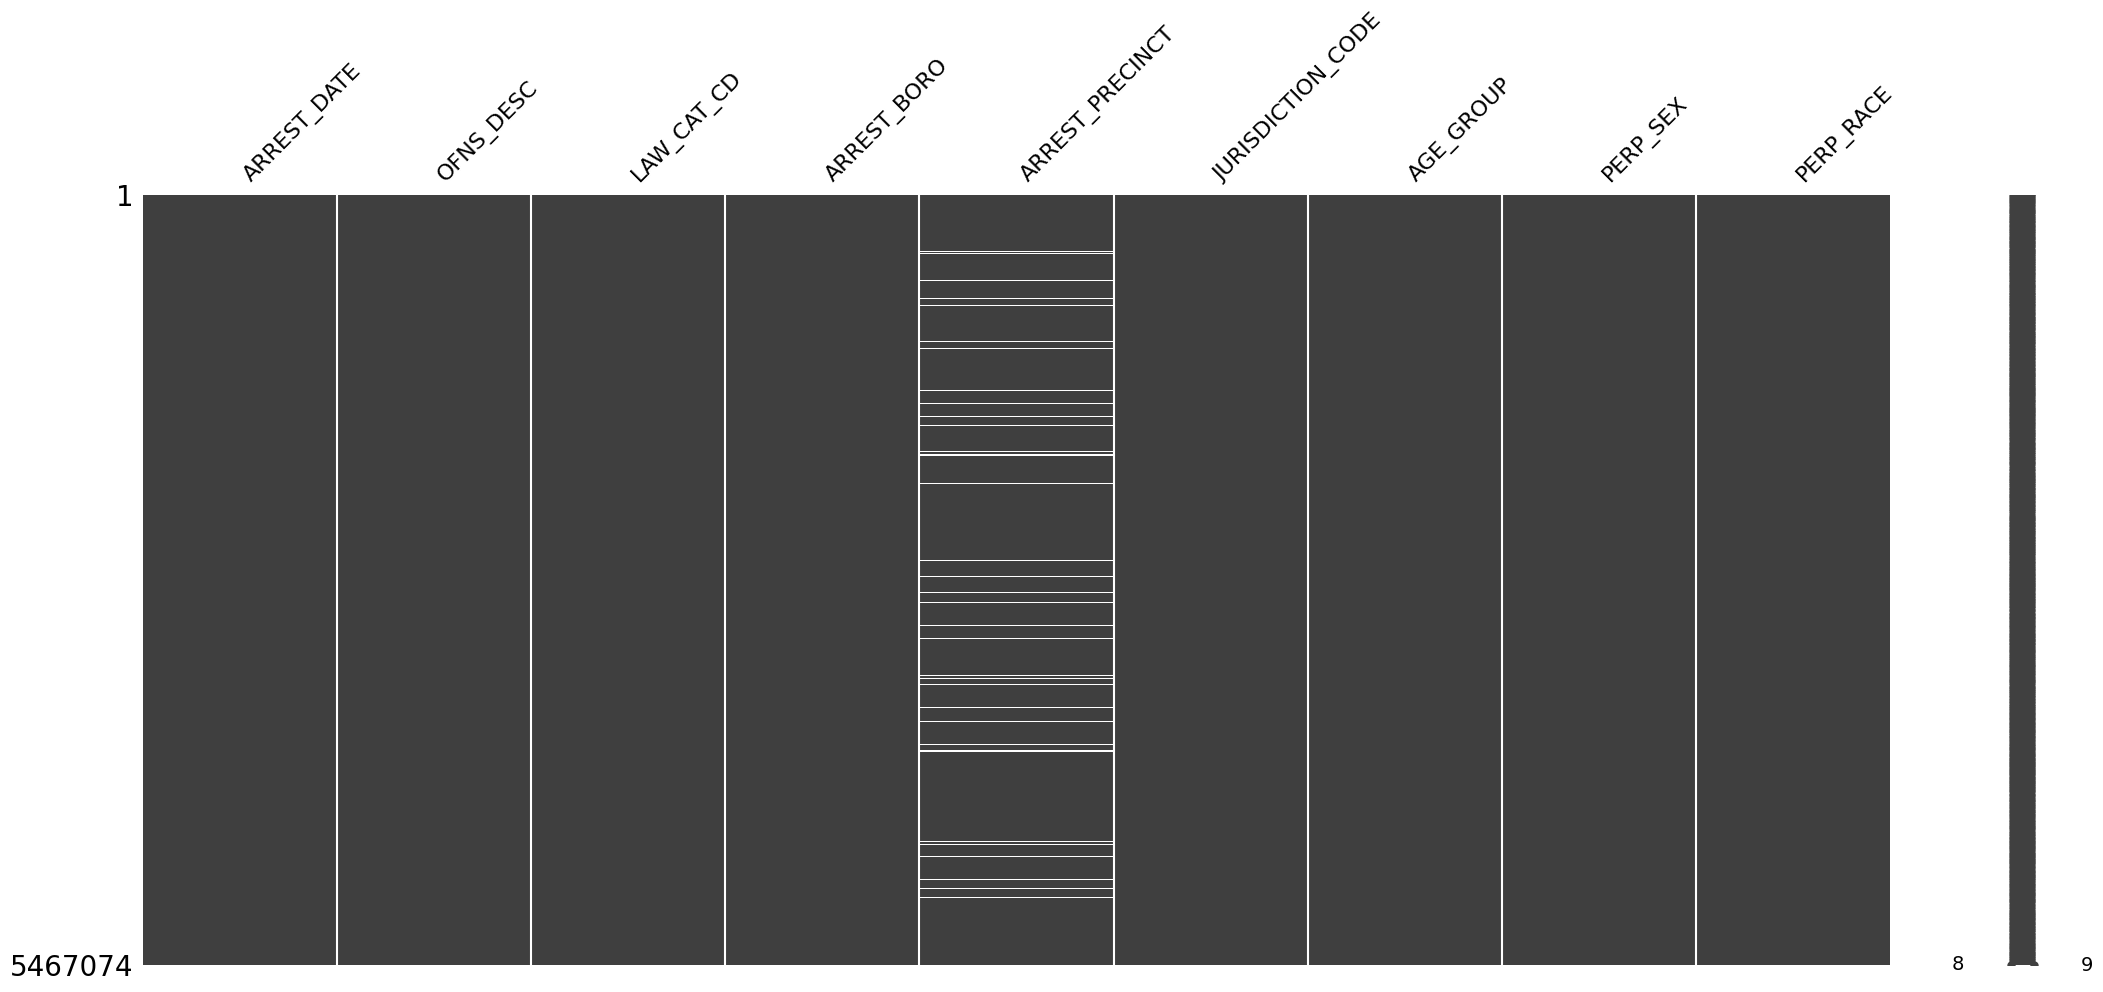

In [ ]:
msno.matrix(df)

In [ ]:

df['AGE_GROUP'] = df['AGE_GROUP'].astype(str).str.replace(r'^\d+$', 'UNKNOWN', regex=True)

# Ahora los valores que eran números enteros en la columna 'AGE_GROUP' se han reemplazado por 'Unknown', ya que hay algunos grupos que no corresponden


In [ ]:
df.duplicated().sum()

747096

##**Carga y descripcion general de datos - Colisiones(Choques)**

In [ ]:
# Leer los datos desde un archivo csv

url = 'https://drive.google.com/uc?id=1hSazRqQqQJDmmCQwVXTE30sh-L4-P6ed&confirm=t'

# Descargar en archivo temporal
with open('temp.csv', 'wb') as f:
    f.write(requests.get(url).content)

# Leer en Dataframe
df2 = pd.read_csv('temp.csv')


<ipython-input-3-710d996732e3>:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('temp.csv')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039259 entries, 0 to 2039258
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
df2.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df2)

2039259

In [ ]:
# Numero de valores faltantes por cada columna
df2.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           634398
ZIP CODE                          634640
LATITUDE                          231283
LONGITUDE                         231283
LOCATION                          231283
ON STREET NAME                    430598
CROSS STREET NAME                 766140
OFF STREET NAME                  1701034
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6495
CONTRIBUTING FACTOR VEHICLE 2     312718
CONTRIBUTING FACTOR VEHICLE 3    1894258
CONTRIBUTING FACTOR VEHICLE 4    2006653
CONTRIBUTING FACTOR VEHICLE 5    2030431
COLLISION_ID                           0
VEHICLE TYPE COD

<Axes: >

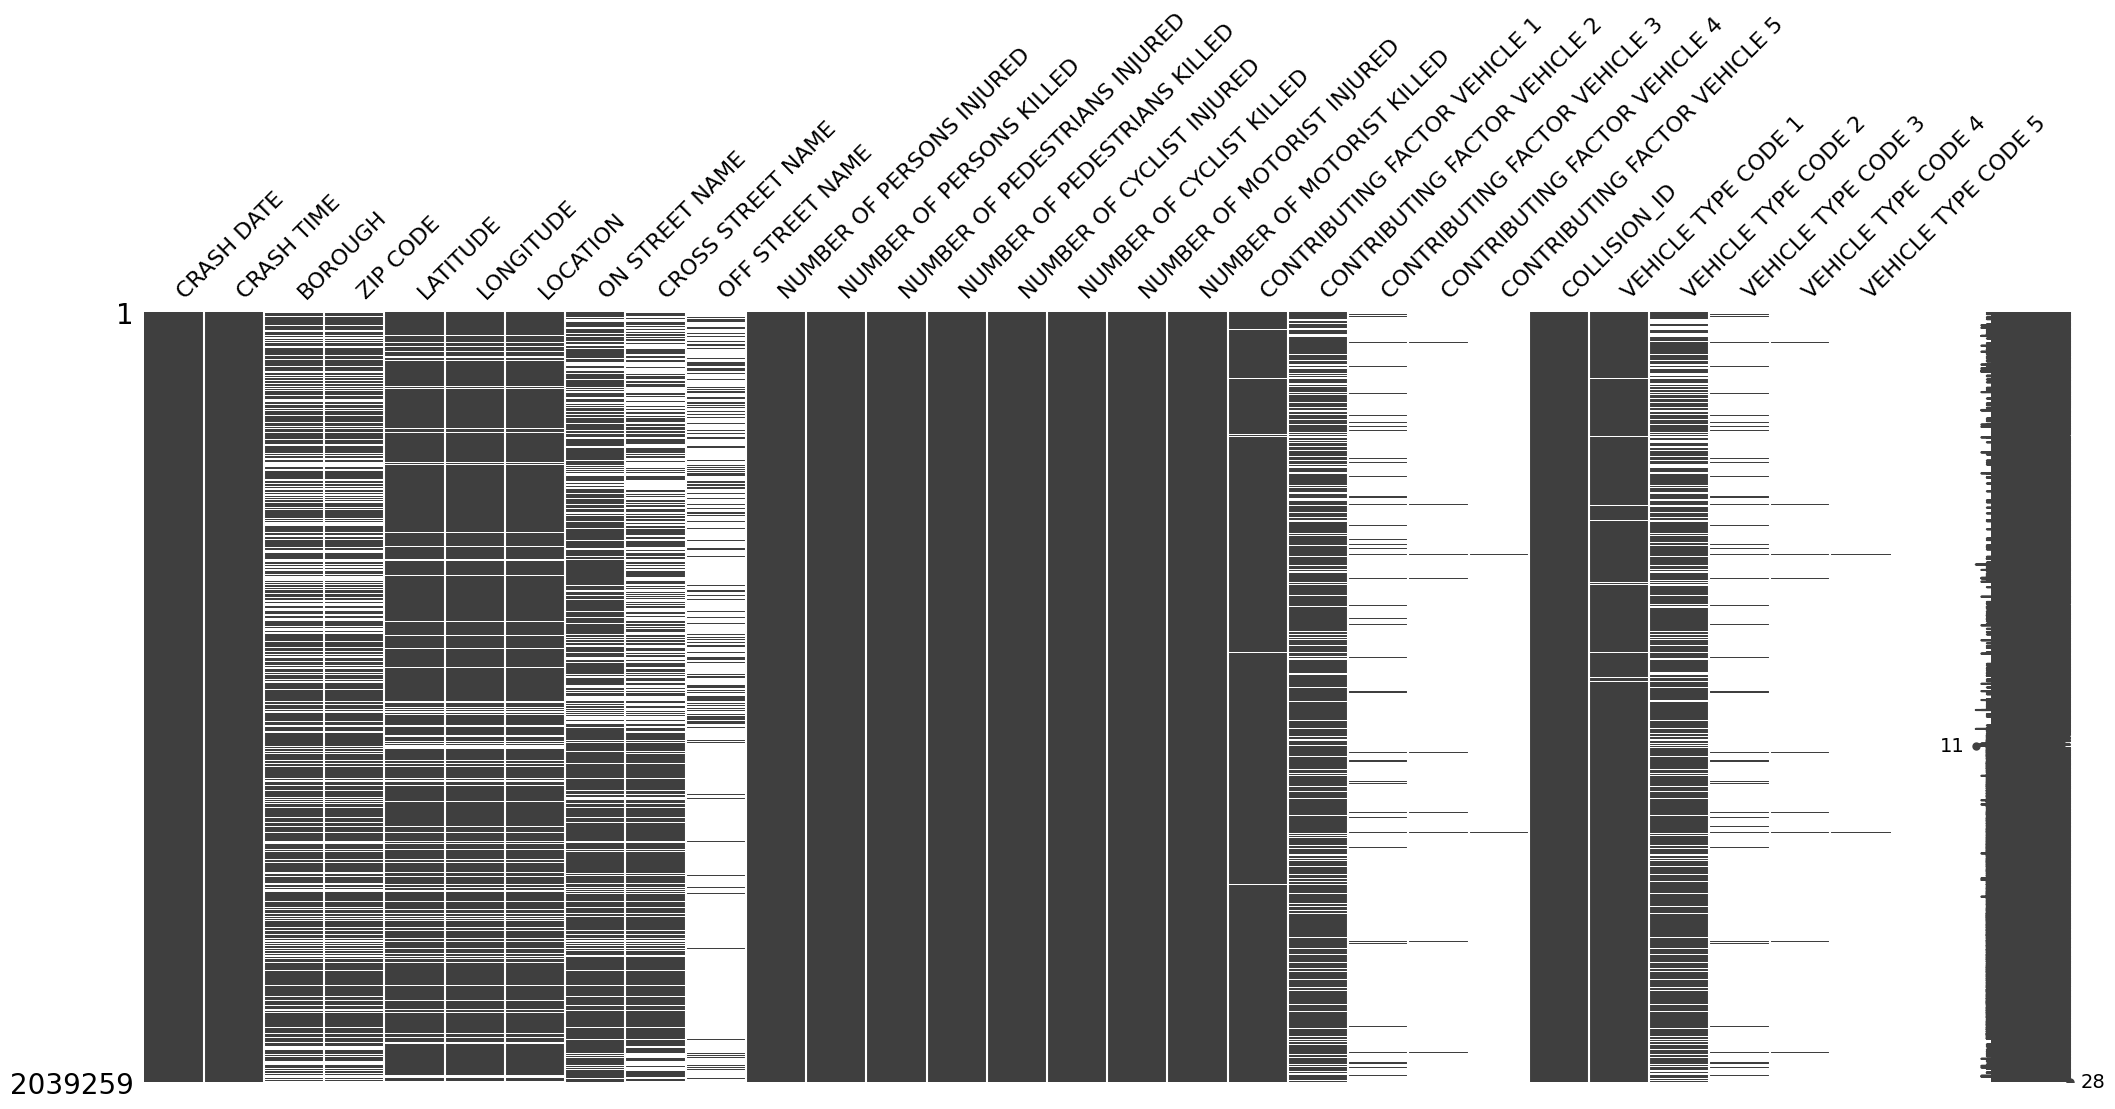

In [ ]:
msno.matrix(df2)

Como se puede ver, este conjunto de datos cuenta con un numero significativo de datos faltantes.

<Axes: >

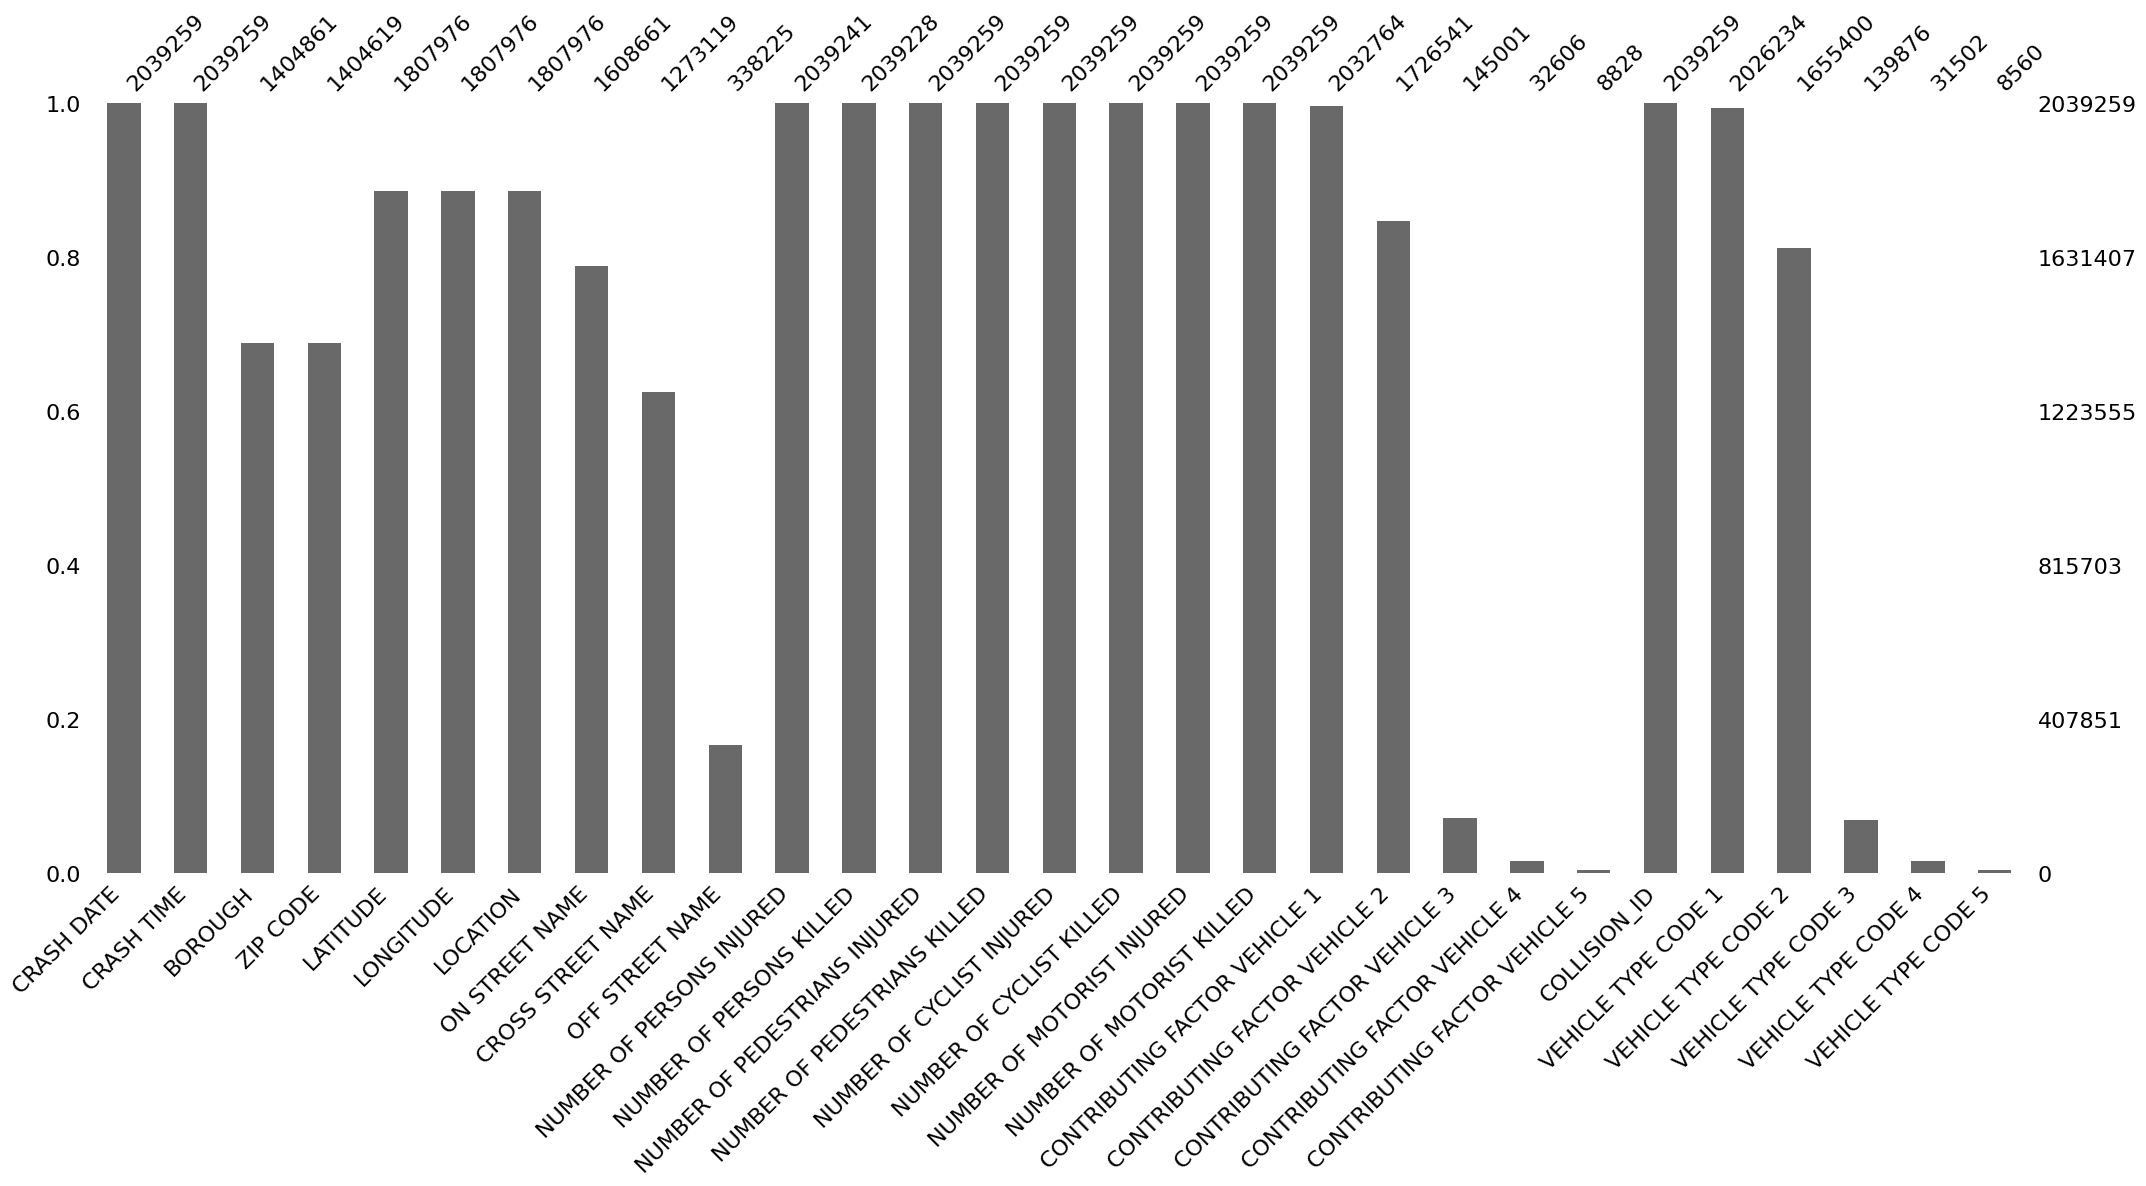

In [ ]:
msno.bar(df2)

In [ ]:
# Función para contar el número de vehículos en un choque
def contar_vehiculos_en_choque(row):
    vehiculos = ["VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"]
    return sum(1 for v in vehiculos if not pd.isnull(row[v]))

# Aplicar la función a tu DataFrame
df2['NUMBER OF VEHICLES IN CRASH'] = df2.apply(contar_vehiculos_en_choque, axis=1)

In [ ]:
def asignar_sector(latitud, longitud, borough):
    if pd.notnull(borough):
        return borough
    if 40.697670 <= latitud <= 40.882214 and -74.011056 <= longitud <= -73.907755:
        return 'MANHATTAN'
    elif 40.499790 <= latitud <= 40.739446 and -74.041878 <= longitud <= -73.855673:
        return 'BROOKLYN'
    elif 40.477398 <= latitud <= 40.817223 and -73.962583 <= longitud <= -73.700272:
        return 'QUEENS'
    elif 40.785946 <= latitud <= 40.917577 and -73.933406 <= longitud <= -73.765006:
        return 'BRONX'
    elif 40.477398 <= latitud <= 40.643681 and -74.259090 <= longitud <= -74.053619:
        return 'STATEN ISLAND'
    else:
        return 'UNKNOWN'

# Aplicar la función a las filas con valores faltantes en 'BOROUGH'
df2['BOROUGH'] = df2.apply(lambda row: asignar_sector(row['LATITUDE'], row['LONGITUDE'], row['BOROUGH']), axis=1)


Para evitar tener nulos en las calles, lo que hago es tomar una calle de donde fue el choque como referencia y lo guardo en una nueva columna

In [ ]:
def obtener_referencia_calle(row):
    if not pd.isnull(row['ON STREET NAME']):
        return row['ON STREET NAME']
    elif not pd.isnull(row['CROSS STREET NAME']):
        return row['CROSS STREET NAME']
    elif not pd.isnull(row['OFF STREET NAME']):
        return row['OFF STREET NAME']
    else:
        return 'Unknown'

# Aplicar la función a las filas del DataFrame
df2['REFERENCE STREET'] = df2.apply(obtener_referencia_calle, axis=1)

In [ ]:
# Lista de columnas que deseas eliminar
columnas_a_eliminar2 = ['ZIP CODE','ON STREET NAME','CROSS STREET NAME','OFF STREET NAME','LATITUDE','LONGITUDE','LOCATION', 'CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','COLLISION_ID','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']

# Elimina las columnas especificadas
df2 = df2.drop(columnas_a_eliminar2, axis=1)

# Ahora df no contiene las columnas especificadas

In [ ]:
df2.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,NUMBER OF VEHICLES IN CRASH,REFERENCE STREET
0,09/11/2021,2:39,UNKNOWN,2.0,0.0,0,0,0,0,2,0,2,WHITESTONE EXPRESSWAY
1,03/26/2022,11:45,UNKNOWN,1.0,0.0,0,0,0,0,1,0,1,QUEENSBORO BRIDGE UPPER
2,06/29/2022,6:55,UNKNOWN,0.0,0.0,0,0,0,0,0,0,2,THROGS NECK BRIDGE
3,09/11/2021,9:35,BROOKLYN,0.0,0.0,0,0,0,0,0,0,1,1211 LORING AVENUE
4,12/14/2021,8:13,BROOKLYN,0.0,0.0,0,0,0,0,0,0,0,SARATOGA AVENUE


<Axes: >

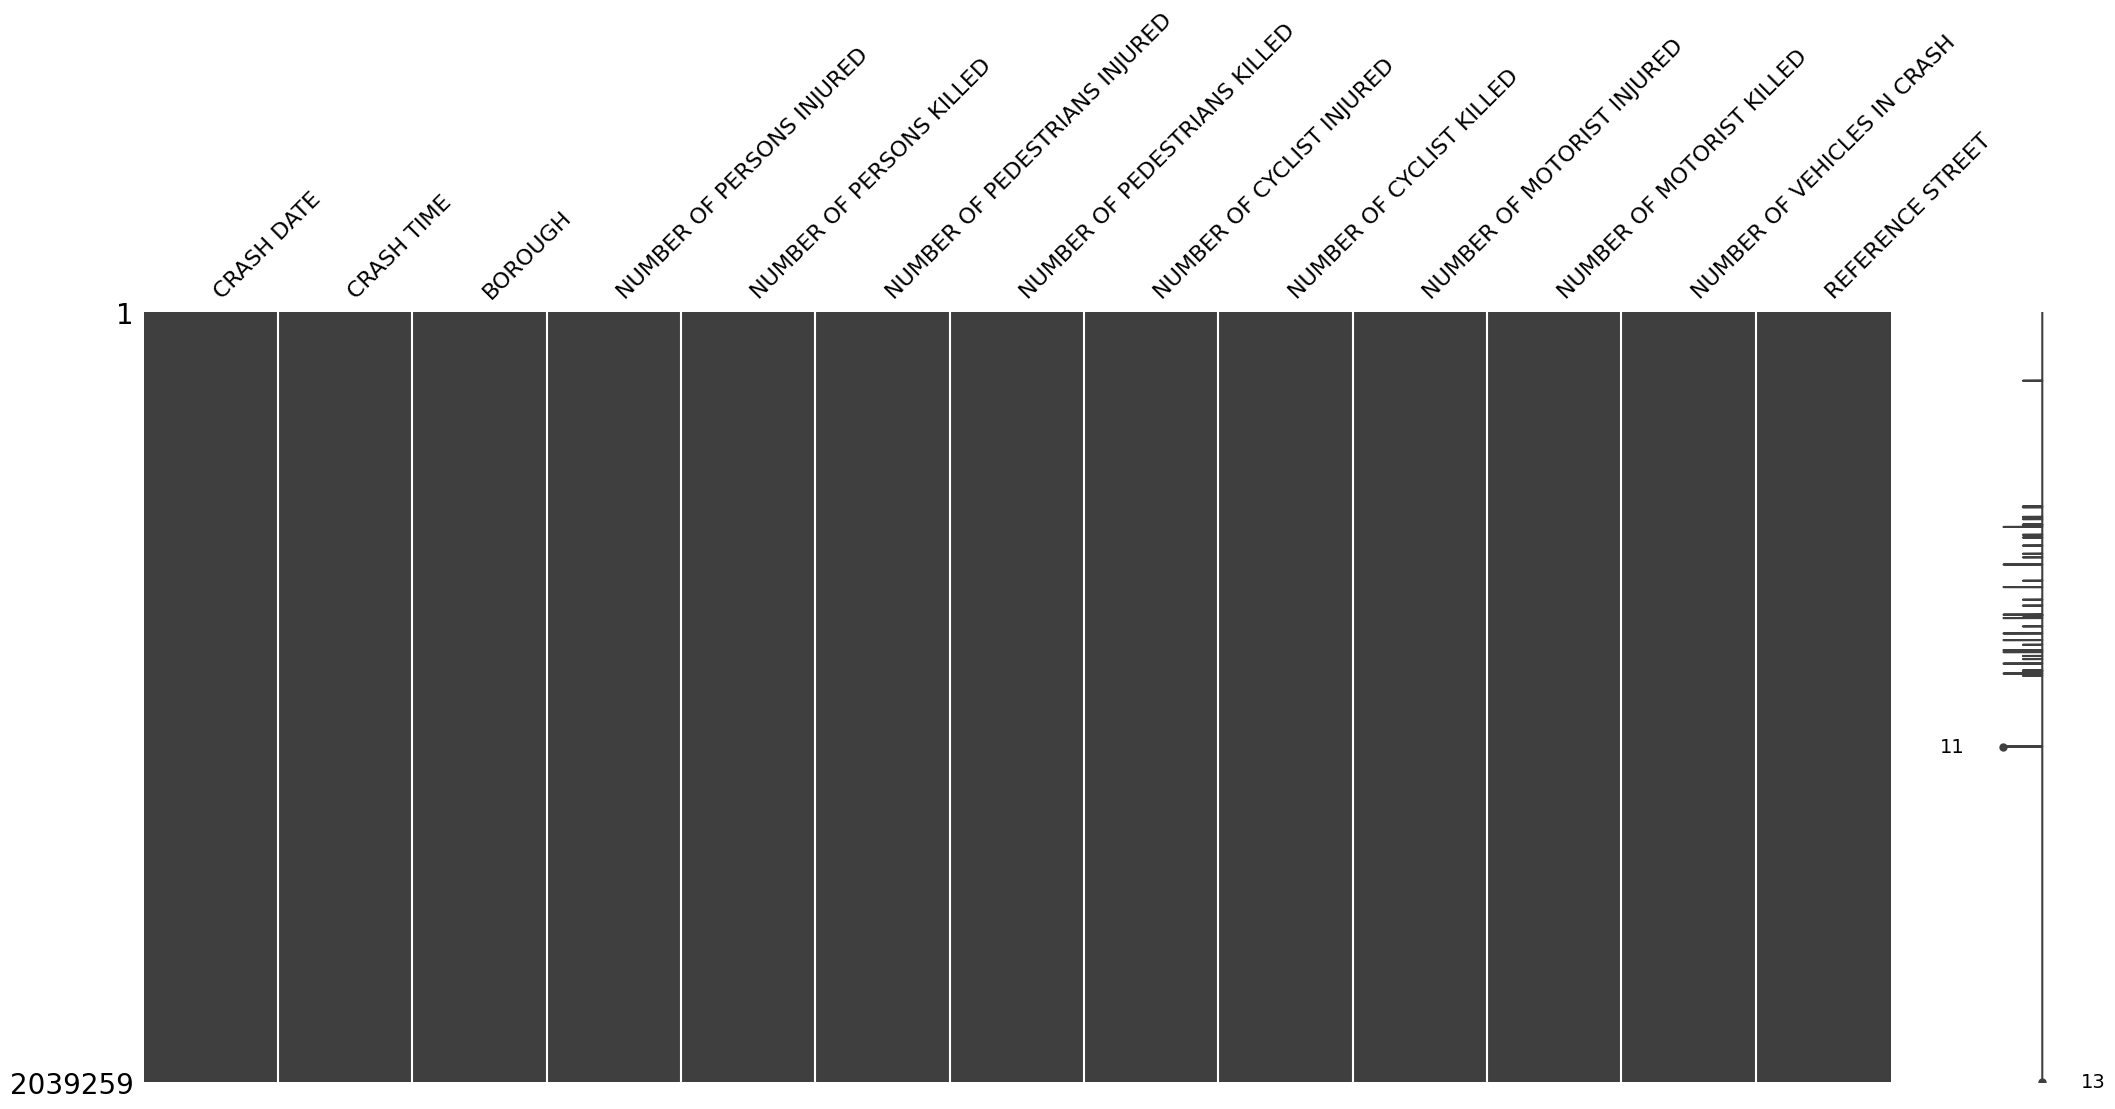

In [ ]:
msno.matrix(df2)

Verifico nuevamente que tal resulto el dataset con las transformaciones

##**Carga y descripcion general de datos - Colisiones(Personas)**

In [ ]:
# Leer los datos desde un archivo csv

url = 'https://drive.google.com/uc?id=17SOw754g9NsVLIwSFU013l6dU7MshugW&confirm=t'

# Descargar en archivo temporal
with open('temp.csv', 'wb') as f:
    f.write(requests.get(url).content)

# Leer en Dataframe
df3 = pd.read_csv('temp.csv')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193416 entries, 0 to 5193415
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   UNIQUE_ID              int64  
 1   COLLISION_ID           int64  
 2   CRASH_DATE             object 
 3   CRASH_TIME             object 
 4   PERSON_ID              object 
 5   PERSON_TYPE            object 
 6   PERSON_INJURY          object 
 7   VEHICLE_ID             float64
 8   PERSON_AGE             float64
 9   EJECTION               object 
 10  EMOTIONAL_STATUS       object 
 11  BODILY_INJURY          object 
 12  POSITION_IN_VEHICLE    object 
 13  SAFETY_EQUIPMENT       object 
 14  PED_LOCATION           object 
 15  PED_ACTION             object 
 16  COMPLAINT              object 
 17  PED_ROLE               object 
 18  CONTRIBUTING_FACTOR_1  object 
 19  CONTRIBUTING_FACTOR_2  object 
 20  PERSON_SEX             object 
dtypes: float64(2), int64(2), object(17)
memory usage: 832.

In [ ]:
df3.head(5)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [ ]:
len(df3)

5193416

In [ ]:
# Numero de valores faltantes por cada columna
df3.isnull().sum()

UNIQUE_ID                      0
COLLISION_ID                   0
CRASH_DATE                     0
CRASH_TIME                     0
PERSON_ID                     19
PERSON_TYPE                    0
PERSON_INJURY                  0
VEHICLE_ID                209329
PERSON_AGE                545480
EJECTION                 2530922
EMOTIONAL_STATUS         2454281
BODILY_INJURY            2454238
POSITION_IN_VEHICLE      2530553
SAFETY_EQUIPMENT         2530627
PED_LOCATION             5112134
PED_ACTION               5112235
COMPLAINT                2454231
PED_ROLE                  194889
CONTRIBUTING_FACTOR_1    5113445
CONTRIBUTING_FACTOR_2    5113550
PERSON_SEX                585689
dtype: int64

<Axes: >

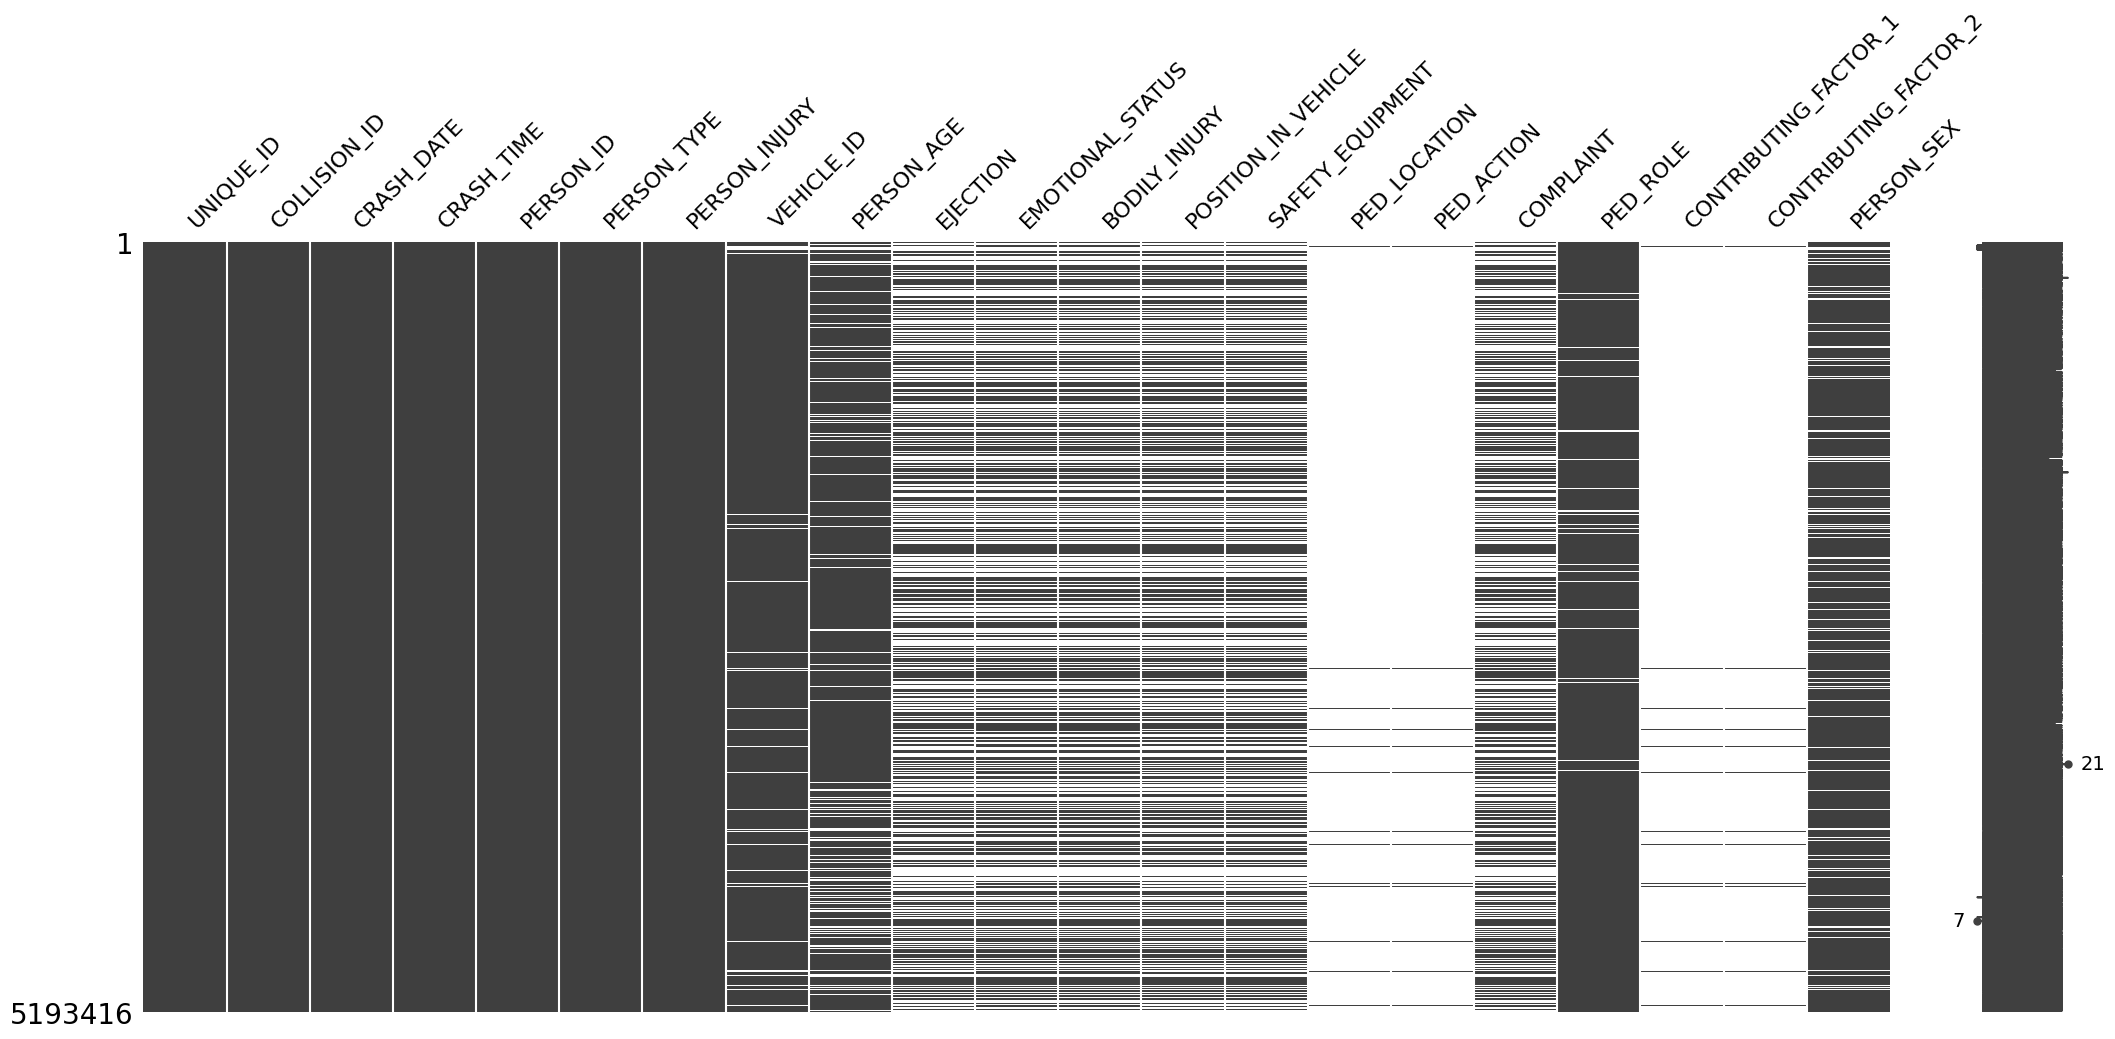

In [ ]:
msno.matrix(df3)

<Axes: >

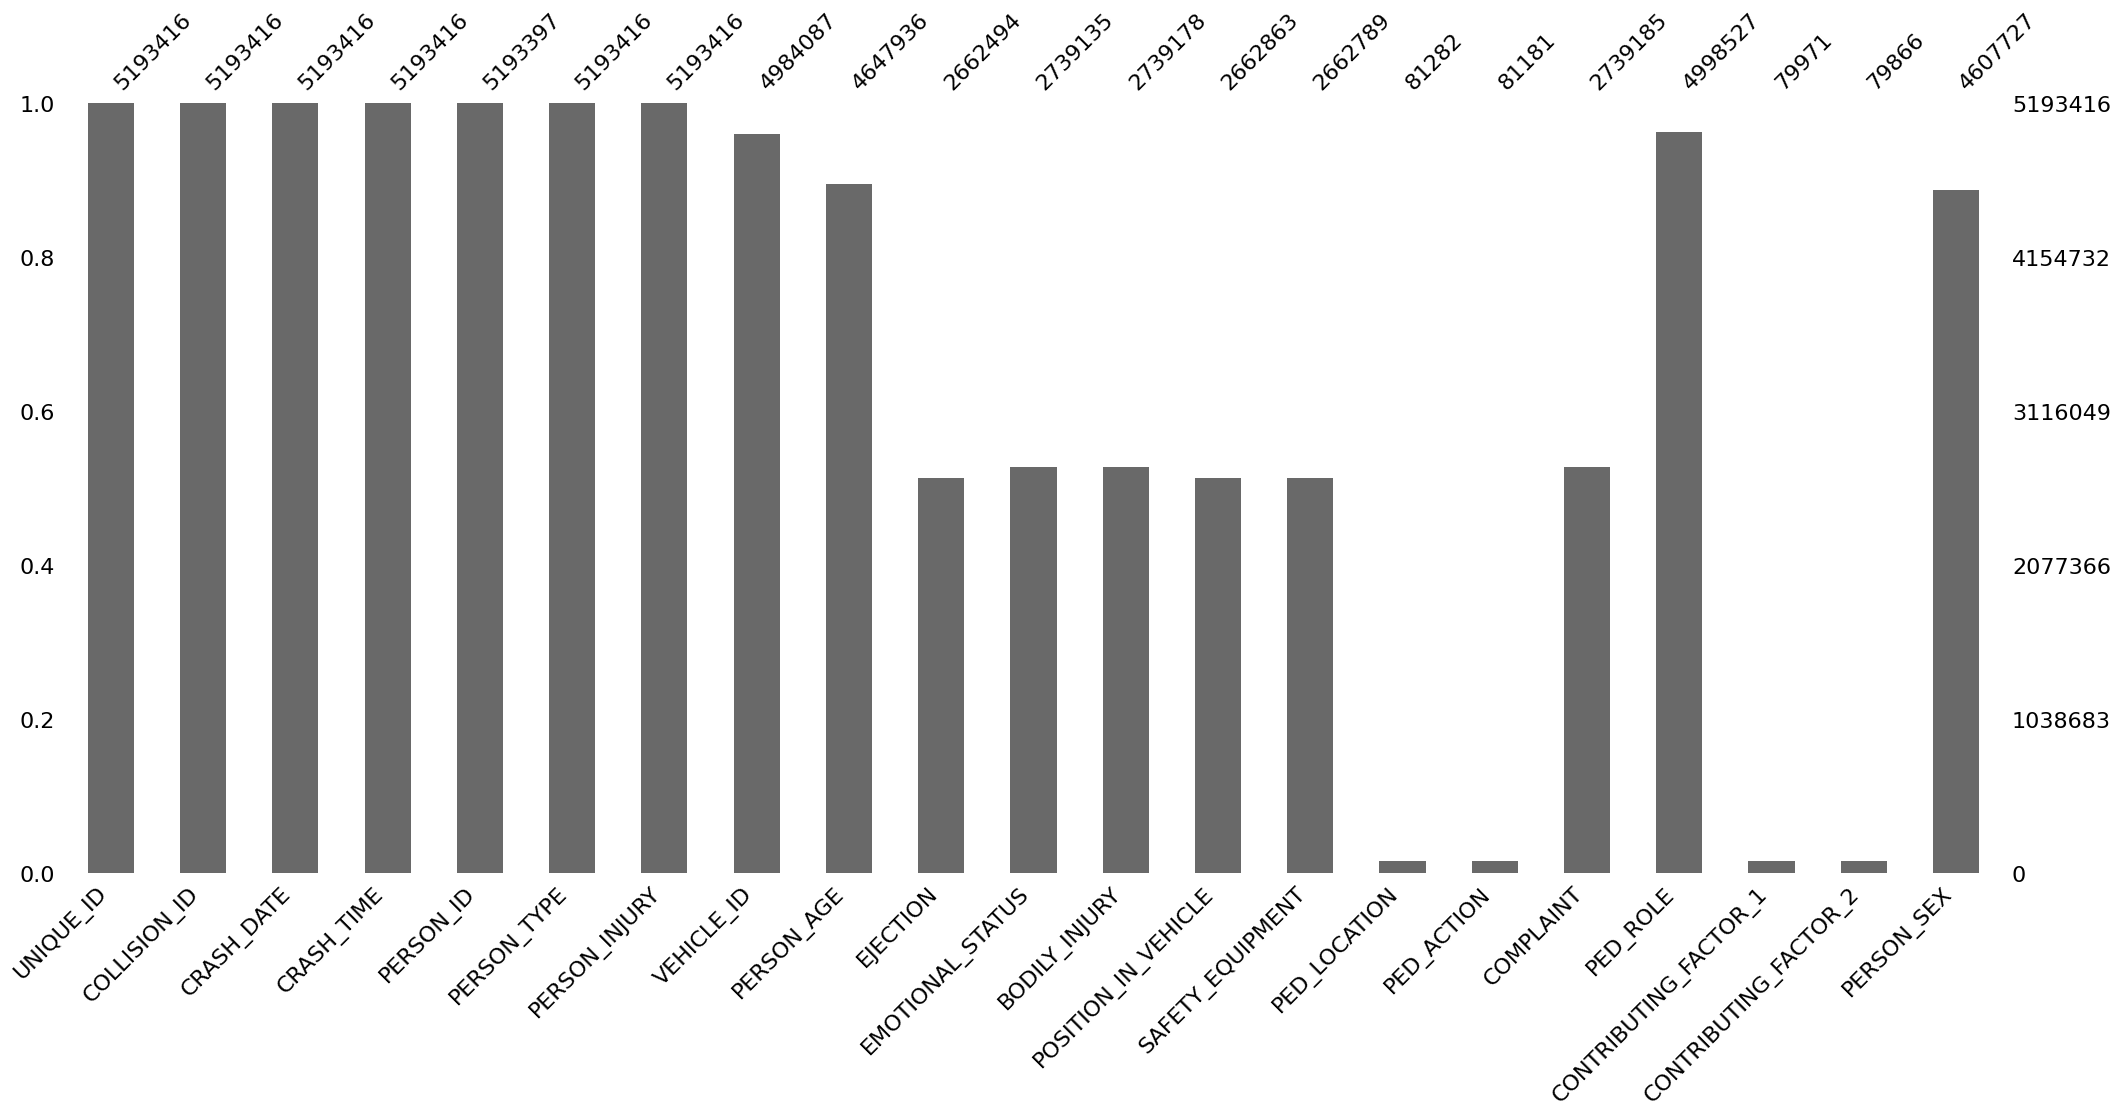

In [ ]:
msno.bar(df3)

In [ ]:
# Lista de columnas que deseas eliminar
columnas_a_eliminar3 = ['UNIQUE_ID','COLLISION_ID','PERSON_ID','VEHICLE_ID','EJECTION','PED_LOCATION','PED_ACTION','CONTRIBUTING_FACTOR_1','CONTRIBUTING_FACTOR_2']

# Elimina las columnas especificadas
df3 = df3.drop(columnas_a_eliminar3, axis=1)

# Ahora df no contiene las columnas especificadas

In [ ]:
# Teniendo en cuenta los valores ya establecidos en varias Columnas donde existe el valor Unknown, se reemplazaran los valores vacios con Unknown.
# Las columnas son EJECTION, EMOTIONAL_STATUS, BODILY_INJURY, POSITION_IN_VEHICLE, SAFETY_EQUIPMENT, COMPLAINT, existen algunas otras, pero por su valor tan bajo de valores, se prefiere eliminarlas
df3['EMOTIONAL_STATUS'].fillna('Unknown', inplace=True)
df3['BODILY_INJURY'].fillna('Unknown', inplace=True)
df3['POSITION_IN_VEHICLE'].fillna('Unknown', inplace=True)
df3['SAFETY_EQUIPMENT'].fillna('Unknown', inplace=True)
df3['COMPLAINT'].fillna('Unknown', inplace=True)
#Reemplazo la columna PERSON_SEX por U, de Unidentified como esta establecido en el dataset para estandarizar la columna y remover registros vacios
df3['PERSON_SEX'].fillna('U', inplace=True)

In [ ]:
mapeo_genero2 = {'M': 'Male', 'F': 'Female', 'U':'Unidentified'}

df3['PERSON_SEX'] = df3['PERSON_SEX'].replace(mapeo_genero2)

In [ ]:
df3.sample(5)

,CRASH_DATE,CRASH_TIME,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX
3705089,11/08/2020,3:40,Occupant,Unspecified,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Registrant,Unidentified
3820450,12/10/2020,22:10,Occupant,Unspecified,39.0,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,Does Not Apply,Passenger,Female
2985080,09/27/2017,13:00,Occupant,Unspecified,26.0,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,Does Not Apply,Driver,Female
4070414,05/19/2021,9:00,Pedestrian,Injured,30.0,Conscious,Entire Body,Unknown,Unknown,Complaint of Pain or Nausea,Pedestrian,Male
4115998,06/30/2021,15:45,Occupant,Unspecified,25.0,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt & Harness,Does Not Apply,Passenger,Female


<Axes: >

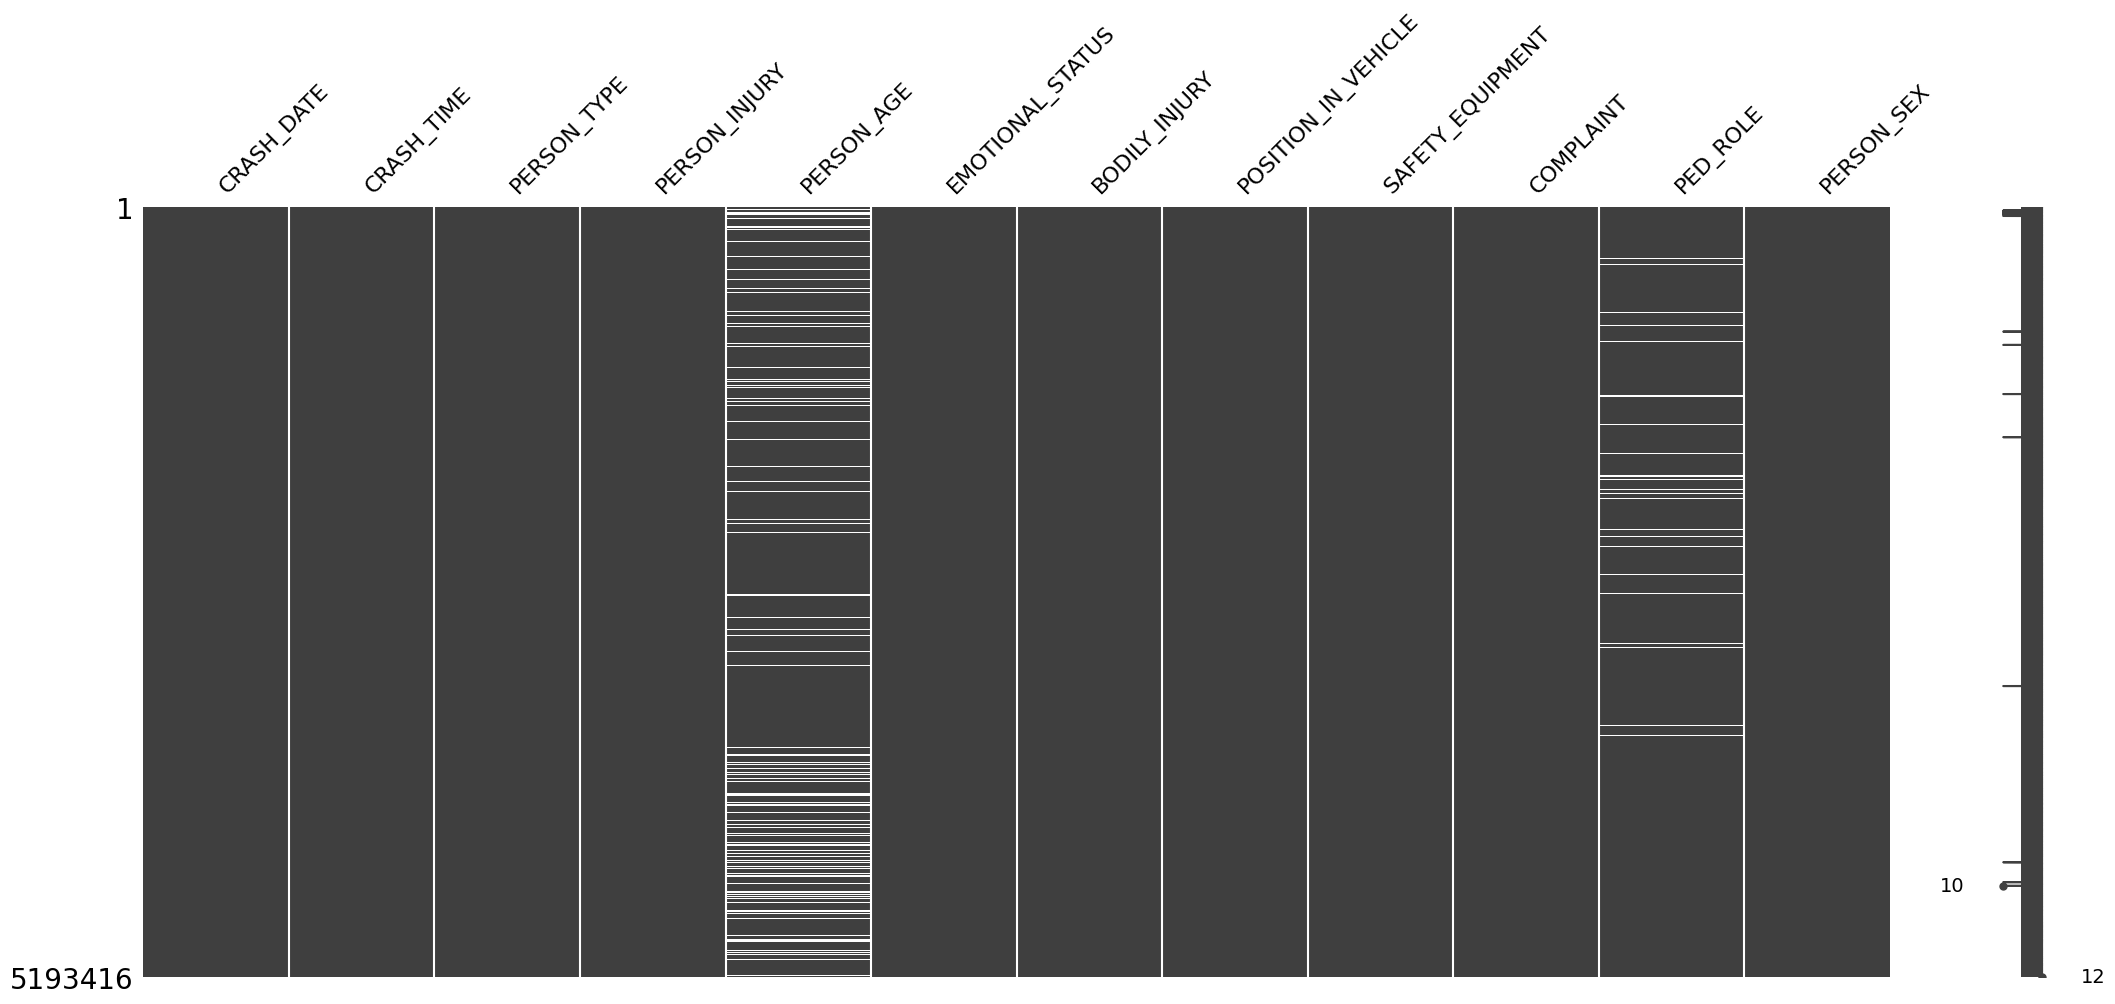

In [ ]:
msno.matrix(df3)

<Axes: >

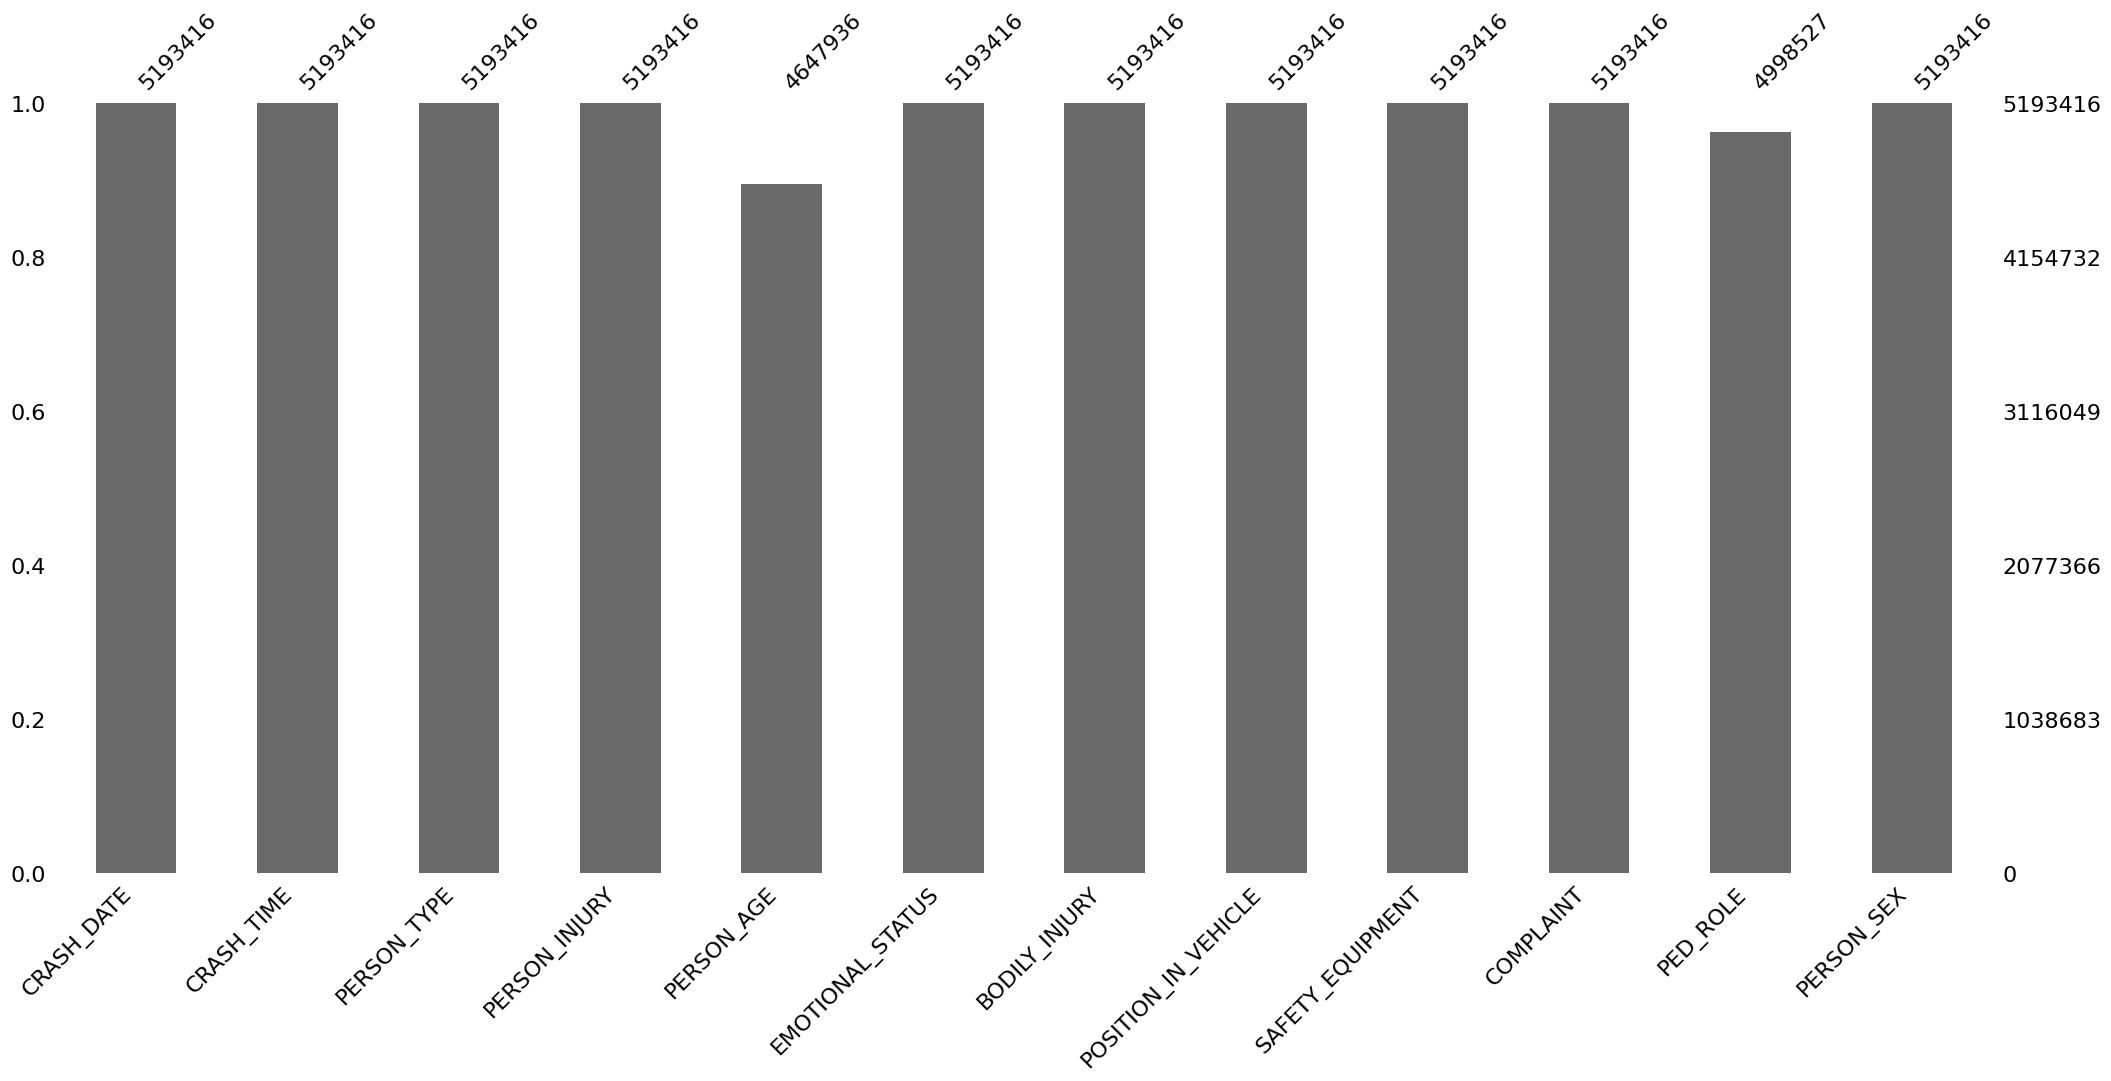

In [ ]:
msno.bar(df3)

In [ ]:
df3['PED_ROLE'].unique()

array(['Registrant', 'Passenger', 'Notified Person', 'Driver',
       'Pedestrian', 'Witness', 'Policy Holder', 'Owner', 'Other', nan,
       'In-Line Skater'], dtype=object)